In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")
print(df[:5])

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
x=df.iloc[:,[3,4]].values
print(x[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [4]:
# onehot encoding
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))'''

"from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')\nx = np.array(ct.fit_transform(x))"

In [5]:
k=5 #no of clusters.

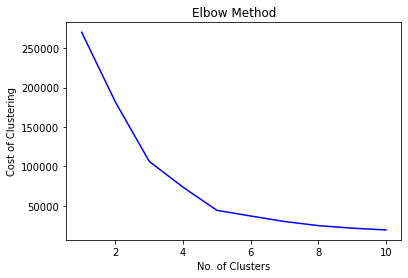

In [6]:
#implementing elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmns=KMeans(n_clusters=i,init='k-means++')
    kmns.fit(x)
    wcss.append(kmns.inertia_)
plt.plot(range(1,11),wcss,color='blue')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Cost of Clustering")
plt.show()

In [7]:
#from above plot we can know what number of cluster is required.
cluster=KMeans(n_clusters=k)
classes=cluster.fit_predict(x)

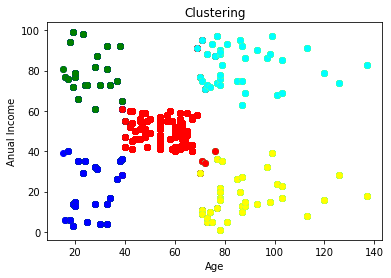

In [8]:
# Visualising the Training set results
cls_clr={0:"red",1:"green",2:"blue",3:"cyan",4:"yellow"}
for i in range(x.shape[0]):
    plt.scatter(x[i:,0],x[i:,1], color=cls_clr[classes[i]])
plt.title('Clustering')
plt.xlabel('Age')
plt.ylabel('Anual Income')
plt.show()